Demo of an epidemic on a network

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
import matplotlib.pyplot as plt
import networkx as nx
from SellkeSimulation.simulation_code import sir_network_sellke_simple

C:\Users\mfyles\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


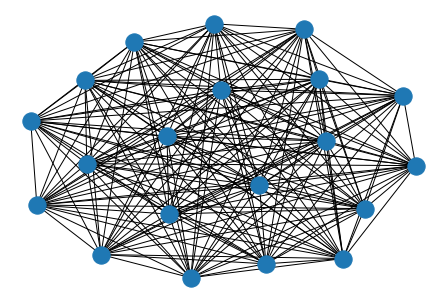

In [2]:
G = nx.complete_graph(20)
nx.draw(G)

We will be simulating an epidemic on the above graph, although for a much larger population size. There exists some results on how far the epidemic will spread in the complete population, so we will use Monte Carlo simulation to check that the simulation works as intended.

In [3]:
G = nx.complete_graph(200)
my_network_epidemic = sir_network_sellke_simple(G, beta = 0.008, I_parameters = 0.5, infected_started = [1])

In [4]:
my_network_epidemic = sir_network_sellke_simple(G, beta = 0.008, I_parameters = 1.5, infected_started = [1])
my_network_epidemic.iterate_epidemic()
print(f"The final size was of the epidemic was {my_network_epidemic.final_size}")
print(f"Iterations taken= {my_network_epidemic.iterations}")

The final size was of the epidemic was 175
Iterations taken= 10


In [5]:
final_size = []
iterations_taken = []
iterations = 1000
for _ in range(iterations):
    my_network_epidemic = sir_network_sellke_simple(G, beta = 0.008, I_parameters = 1.5, infected_started = [0,1])
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.iterations)

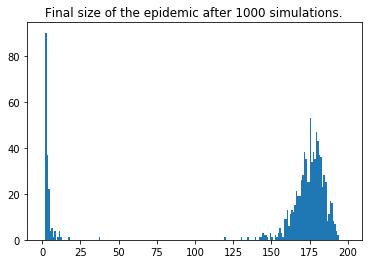

In [6]:
plt.hist(final_size, bins = range(200))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

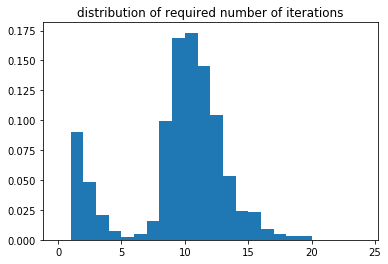

In [7]:
plt.hist(iterations_taken, bins = range(25), density = True)
plt.title(f"distribution of required number of iterations")
plt.show()

Now lets do some more interesting networks and see if we can get results that agree with.

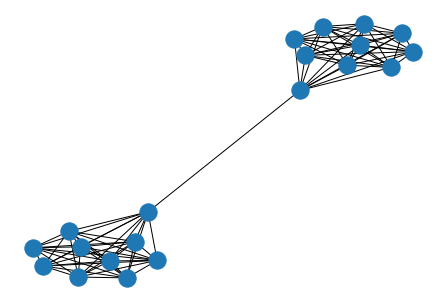

In [8]:
G = nx.barbell_graph(10,0)
nx.draw(G)

In [9]:
G = nx.barbell_graph(100,0)

In [10]:
final_size = []
iterations_taken = []
iterations = 1000
for _ in range(iterations):
    my_network_epidemic = sir_network_sellke_simple(G, beta = 0.025, I_parameters = 1.6, infected_started = [1])
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.iterations)

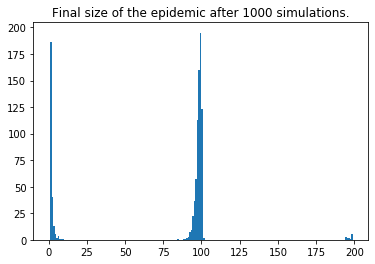

In [11]:
plt.hist(final_size, bins = range(200))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

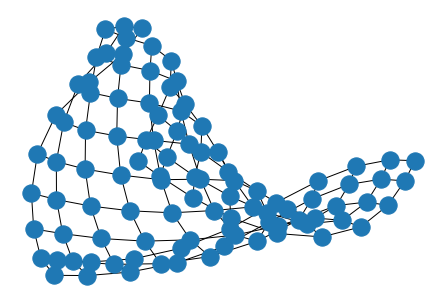

In [12]:
G = nx.grid_2d_graph(10,10)
nx.draw(G)

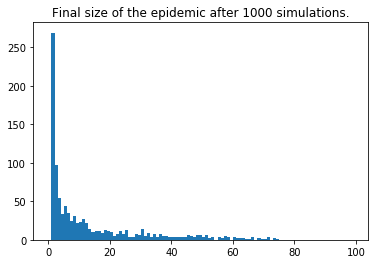

In [20]:
G = nx.grid_2d_graph(10,10)
final_size = []
iterations_taken = []
iterations = 1000
for _ in range(iterations):
    my_network_epidemic = sir_network_sellke_simple(G, beta = 0.5, I_parameters = 1.5, infected_started = 1)
    my_network_epidemic.iterate_epidemic()
    final_size.append(my_network_epidemic.final_size)
    iterations_taken.append(my_network_epidemic.iterations)
plt.hist(final_size, bins = range(100))
plt.title(f"Final size of the epidemic after {iterations} simulations.")
plt.show()

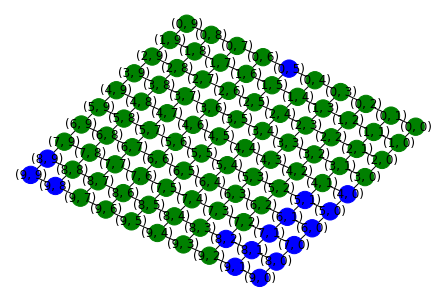

In [47]:
my_network_epidemic = sir_network_sellke_simple(G, beta = 0.7, I_parameters = 1.5, infected_started = 1)
my_network_epidemic.iterate_epidemic()
color_map = []
for node in G:
    if node in my_network_epidemic.infected_nodes:
        color_map.append('green')
    else: color_map.append('blue')      
nx.draw_kamada_kawai(G,node_color = color_map,with_labels = True)
plt.show()

In [36]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    ax : Matplotlib Axes object, optional
       Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
       See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahedral_gr

In [50]:
help(nx.draw_networkx
    )


Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    arrows : bool, optional (default=True)
       For directed graphs, if True draw arrowheads.
       Note: Arrows will be the same color as edges.
    
    arrowstyle : str, optional (default='-|>')
        For directed graphs, choose the style of the arrowsheads.
        See :py:class: `matplo